In [3]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import manifold

Kernel PCA, PCA, ISOMAP, LDA

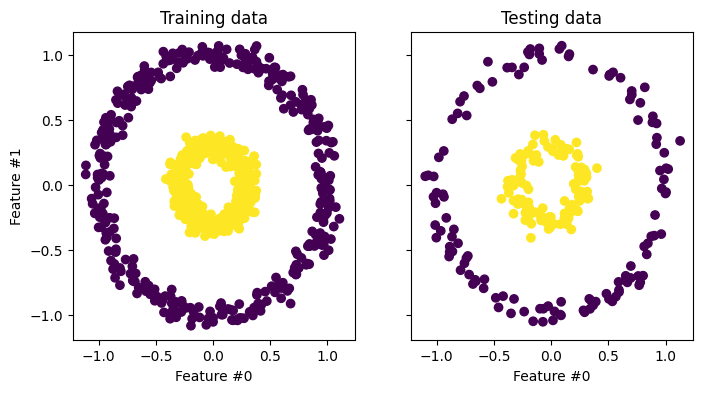

In [4]:
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

n_neighbors = 12
n_components = 2

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")


In [23]:
pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

#lda = LinearDiscriminantAnalysis(n_components=2)
#X_r2 = lda.fit(X_train, y_train).transform(X_test)

isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=1)
X_test_lda = lda.fit(X_train, y_train).transform(X_test)


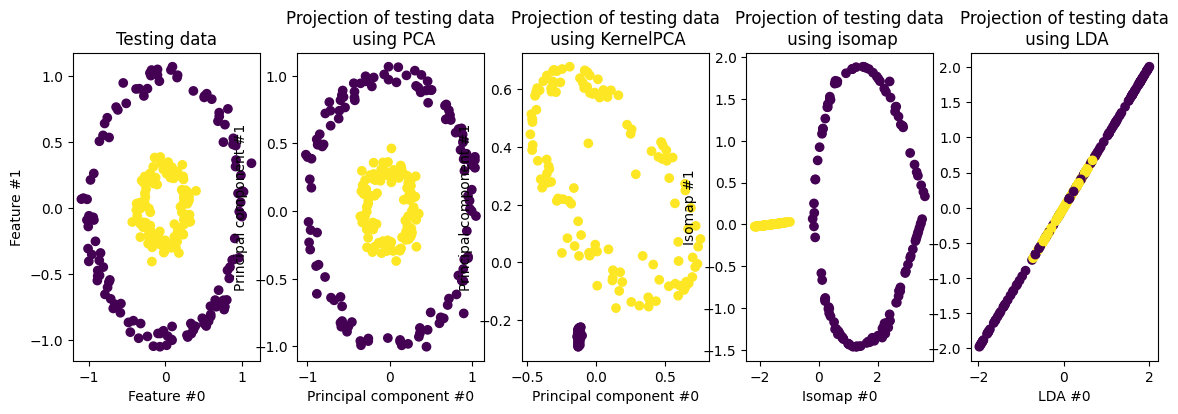

In [24]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax, isomap_proj_ax, lda_proj_ax) = plt.subplots(
    ncols=5, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

isomap_proj_ax.scatter(S_isomap[:, 0], S_isomap[:, 1], c=y_test)
isomap_proj_ax.set_ylabel("Isomap #1")
isomap_proj_ax.set_xlabel("Isomap #0")
_ = isomap_proj_ax.set_title("Projection of testing data\n using isomap")

lda_proj_ax.scatter(X_test_lda[:, 0], X_test_lda[:, 0], c=y_test)
lda_proj_ax.set_xlabel("LDA #0")
_ = lda_proj_ax.set_title("Projection of testing data\n using LDA")